# Airline Dataset
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Reading Dataset and Checking the NaN Values , Data Types , and Statistical Analysis

1. Since data is in form of excel file we have to use pandas read_excel to load the data
2. After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row
3. Check whether any null values are there or not. if it is present then following can be done,
    1. Filling NaN values with mean, median and mode using fillna() method
4. Describe data --> which can give statistical analysis

In [5]:
df=pd.read_excel("Data_Train.xlsx")


In [6]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
df.shape

(10683, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [10]:
df.describe(include=object)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [11]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
df['Route'].mode()

0    DEL → BOM → COK
Name: Route, dtype: object

In [13]:
df['Route']=df['Route'].fillna(df['Route'].mode()[0])

In [14]:
df['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [15]:
df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [16]:
df.isnull().sum().sum()

0

## From df.info() we can see that Date_of_Journey is a object data type
1.Therefore, we have to convert this datatype into timestamp so  that we can use that column properly to find the insights.

2.For this we require pandas **to_datetime** to convert object data type to datetime dtype.



In [2]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])


NameError: name 'df' is not defined

In [18]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10683 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10683 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB


In [20]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

### We can see that Total_Stops is a Categorical column we can replace that column data into categories

In [21]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

C:\Users\Abdul Tahir\AppData\Local\Temp\ipykernel_18952\3142719428.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


In [22]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882


## 1st Insights: How many Flights with respect to their Stopages ?

In [23]:
df['Total_Stops'].value_counts()

Total_Stops
1    5626
0    3491
2    1520
3      45
4       1
Name: count, dtype: int64

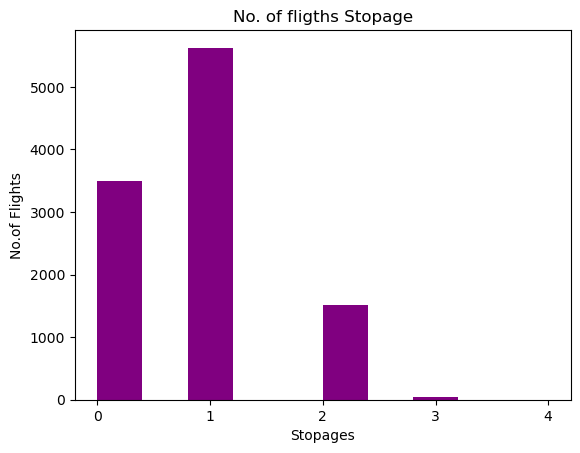

In [24]:
# From This Histogram  we can see that no.of flights and their Stopages
# In this Data maximum flights have 1 stopages 
# And there are few flights which have 3rd and 4th stopages 

plt.title('No. of fligths Stopage')
plt.hist(df['Total_Stops'],color='purple')
plt.xlabel('Stopages')
plt.ylabel('No.of Flights')
plt.xticks(df['Total_Stops'].unique())
plt.show()

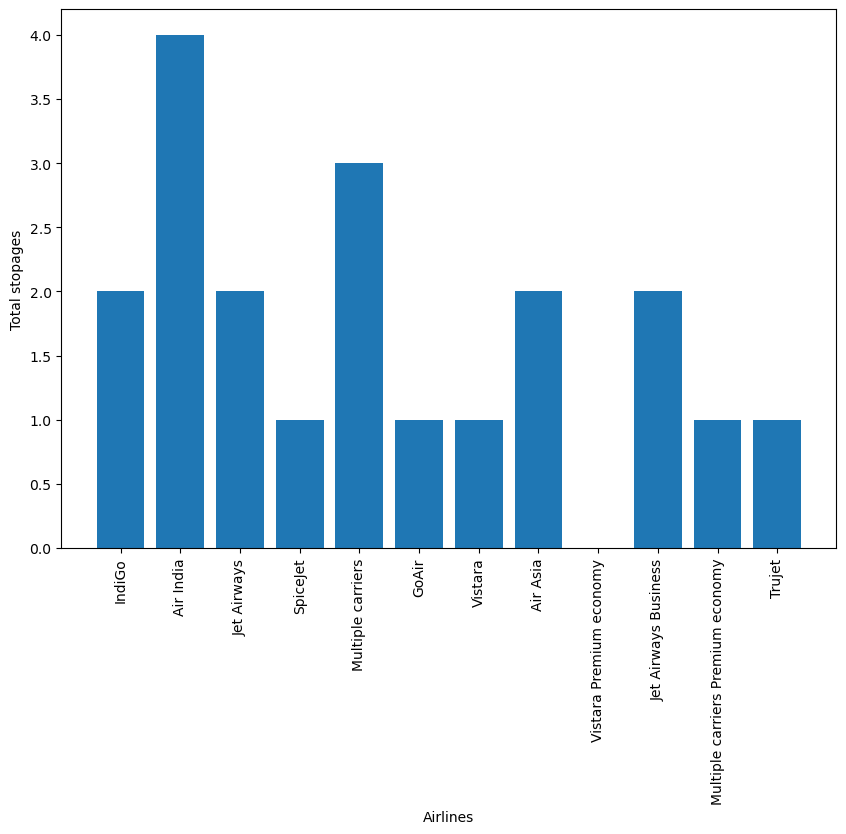

In [25]:
plt.figure(figsize=(10,7))
plt.bar(df['Airline'],df['Total_Stops'])
plt.xlabel('Airlines')
plt.ylabel('Total stopages')
plt.xticks(rotation=90)
# plt.yticks(df['Total_Stops'].unique())
plt.show()


In [26]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [27]:
df[df['Total_Stops']==4]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9182,Air India,2019-03-01,Banglore,New Delhi,BLR → CCU → BBI → HYD → VGA → DEL,05:50,11:20 02 Mar,29h 30m,4,Change airports,17686


In [28]:
df[df['Airline']=='Vistara Premium economy']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
426,Vistara Premium economy,2019-03-03,Banglore,New Delhi,BLR → DEL,16:00,18:35,2h 35m,0,No info,11793
7657,Vistara Premium economy,2019-03-01,Chennai,Kolkata,MAA → CCU,07:05,09:20,2h 15m,0,No info,9125
8615,Vistara Premium economy,2019-04-06,Banglore,Delhi,BLR → DEL,11:30,14:20,2h 50m,0,No info,5969


# 2nd Insights: What flight is Expensive and Cheaper ?

In [29]:
p=df.groupby(['Airline'])['Price'].agg(['min','max']).reset_index().sort_values(by='max',ascending=False)
p

,Airline,min,max
5,Jet Airways Business,46490,79512
4,Jet Airways,1840,54826
6,Multiple carriers,5797,36983
1,Air India,2050,31945
8,SpiceJet,1759,23267
2,GoAir,3398,22794
3,IndiGo,2227,22153
10,Vistara,3687,21730
7,Multiple carriers Premium economy,9845,14629
0,Air Asia,3383,13774


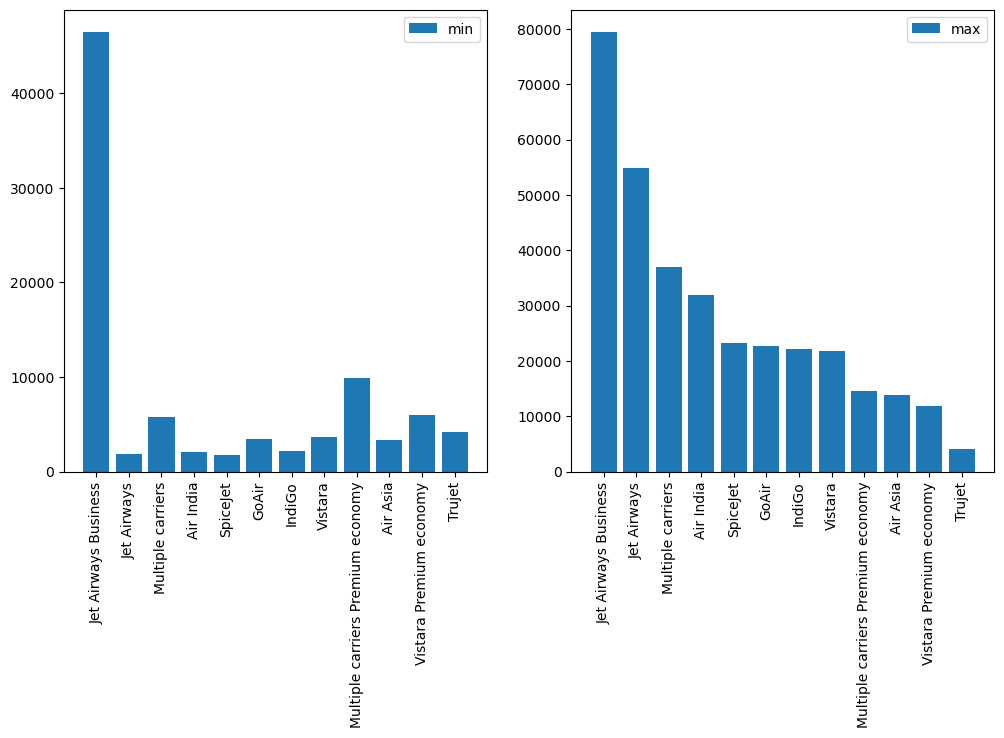

In [30]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.bar(p['Airline'],p['min'],label='min')
plt.xticks(rotation=90)
plt.legend()

plt.subplot(1,2,2)
plt.bar(p['Airline'],p['max'],label='max')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# 3rd Insights: Variation of Flight Price from Source

In [31]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [32]:
df.replace({'New Delhi' :'Delhi'},inplace=True)

In [33]:
sd=df.groupby(['Source','Destination'])['Price'].agg(['sum','max','min','mean']).reset_index()
sd


,Source,Destination,sum,max,min,mean
0,Banglore,Delhi,17614369,79512,3257,8017.464269
1,Chennai,Kolkata,1824949,19630,3145,4789.892388
2,Delhi,Cochin,47817435,52285,3876,10539.439057
3,Kolkata,Banglore,26293736,31945,3480,9158.389411
4,Mumbai,Hyderabad,3526617,25139,1759,5059.708752


In [34]:
sd=df.groupby(['Source','Destination','Airline'])['Price'].agg(['sum','min','max','mean']).reset_index()
sd


,Source,Destination,Airline,sum,min,max,mean
0,Banglore,Delhi,Air Asia,407111,3383,10873,4574.280899
1,Banglore,Delhi,Air India,3067082,3758,31783,9238.198795
2,Banglore,Delhi,GoAir,460246,3398,18558,4948.881720
3,Banglore,Delhi,IndiGo,2758361,3359,22153,5274.112811
4,Banglore,Delhi,Jet Airways,8685125,3359,54826,11021.732234
5,Banglore,Delhi,Jet Airways Business,251377,52229,79512,62844.250000
6,Banglore,Delhi,SpiceJet,823603,3257,23267,4550.292818
7,Banglore,Delhi,Vistara,1143702,4353,21730,6182.172973
8,Banglore,Delhi,Vistara Premium economy,17762,5969,11793,8881.000000
9,Chennai,Kolkata,Air India,147391,3145,19630,5895.640000


In [35]:
sd.nunique()

Source          5
Destination     5
Airline        12
sum            37
min            36
max            37
mean           37
dtype: int64

C:\Users\Abdul Tahir\AppData\Local\Temp\ipykernel_18952\2240470906.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Source',y='sum',hue='Destination',data=sd,ci=None)


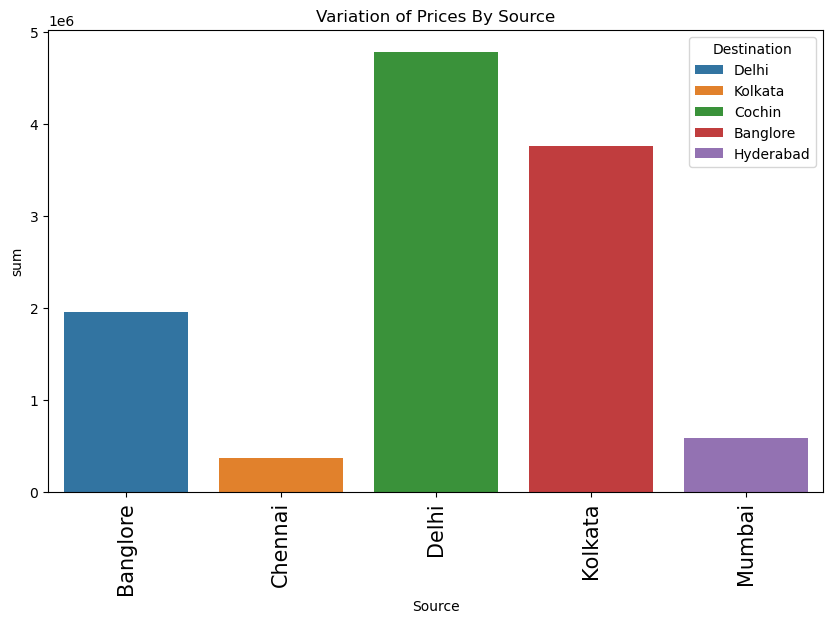

In [36]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x='Source',y='sum',hue='Destination',data=sd,ci=None)
plt.xticks(rotation=90,size=15)
plt.title('Variation of Prices By Source');

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10683 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10683 non-null  int64         
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 918.2+ KB


In [38]:
df['Date_of_Journey'].unique()

<DatetimeArray>
['2019-03-24 00:00:00', '2019-05-01 00:00:00', '2019-06-09 00:00:00',
 '2019-05-12 00:00:00', '2019-03-01 00:00:00', '2019-06-24 00:00:00',
 '2019-03-12 00:00:00', '2019-05-27 00:00:00', '2019-06-01 00:00:00',
 '2019-04-18 00:00:00', '2019-05-09 00:00:00', '2019-04-24 00:00:00',
 '2019-03-03 00:00:00', '2019-04-15 00:00:00', '2019-06-12 00:00:00',
 '2019-03-06 00:00:00', '2019-03-21 00:00:00', '2019-04-03 00:00:00',
 '2019-05-06 00:00:00', '2019-05-15 00:00:00', '2019-06-18 00:00:00',
 '2019-06-15 00:00:00', '2019-04-06 00:00:00', '2019-05-18 00:00:00',
 '2019-06-27 00:00:00', '2019-05-21 00:00:00', '2019-06-03 00:00:00',
 '2019-03-15 00:00:00', '2019-05-03 00:00:00', '2019-03-09 00:00:00',
 '2019-06-06 00:00:00', '2019-05-24 00:00:00', '2019-04-01 00:00:00',
 '2019-04-21 00:00:00', '2019-06-21 00:00:00', '2019-03-27 00:00:00',
 '2019-03-18 00:00:00', '2019-04-12 00:00:00', '2019-04-09 00:00:00',
 '2019-04-27 00:00:00']
Length: 40, dtype: datetime64[ns]

## Extracting Journey Day and Month
For this we require pandas **to_datetime** to convert object data type to datetime dtype.

.dt.day method will extract only day of that date

.dt.month method will extract only month of that date

In [39]:
df['Day_of_Journey']=df['Date_of_Journey'].dt.day
df['Month_of_Journey']=df['Date_of_Journey'].dt.month



In [40]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,12,5
4,IndiGo,2019-03-01,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,1,3


In [41]:
df['Day_of_Journey'].unique()

array([24,  1,  9, 12, 27, 18,  3, 15,  6, 21])

In [42]:
df['Month_of_Journey'].unique()

array([3, 5, 6, 4])

In [43]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,9,6


In [44]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
df.drop(columns=['Date_of_Journey'],inplace=True)

In [45]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,5


# 5th Insights: On what Month have Maximum Flights Take off ?

In [46]:
df['Month_of_Journey'].value_counts()

Month_of_Journey
5    3466
6    3414
3    2724
4    1079
Name: count, dtype: int64

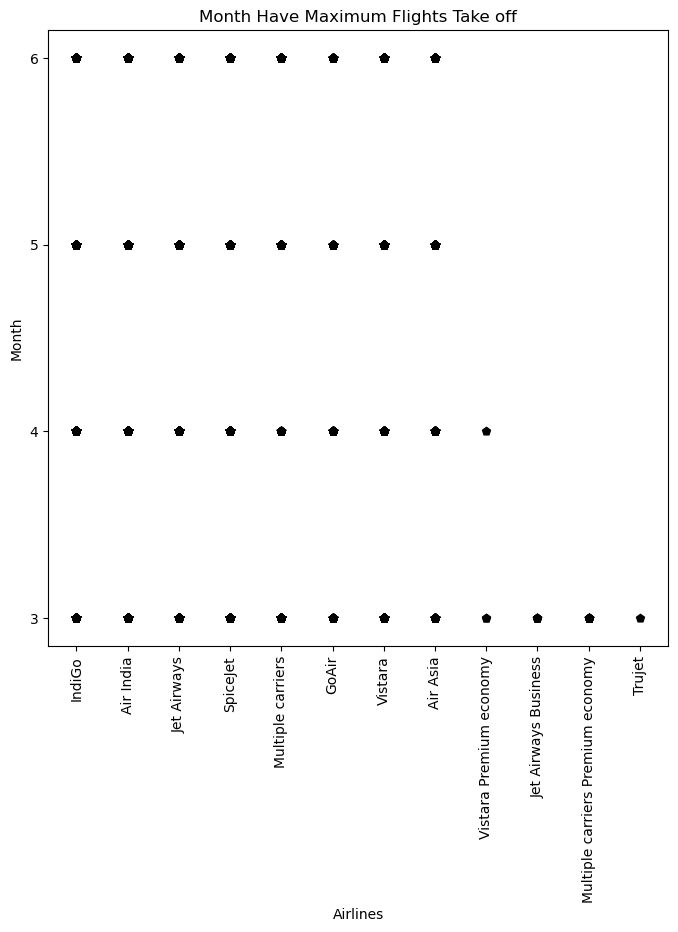

In [47]:
plt.figure(figsize=(8,8))
month=list(df['Month_of_Journey'])
airline=list(df['Airline'])
plt.scatter(airline,month,marker='p',color='k')
plt.xticks(rotation=90)
plt.yticks(df['Month_of_Journey'].unique())
plt.title('Month Have Maximum Flights Take off')
plt.xlabel('Airlines')
plt.ylabel('Month')
plt.show()

In [48]:
df[df['Month_of_Journey']==10]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey


# 6th Insights: What Month has The Maximum Earning

In [49]:
p=df.groupby(['Month_of_Journey'])['Price'].agg(['sum']).reset_index().sort_values(by='sum',ascending=False)
p

,Month_of_Journey,sum
2,5,31635040
3,6,30141510
0,3,29073812
1,4,6226744


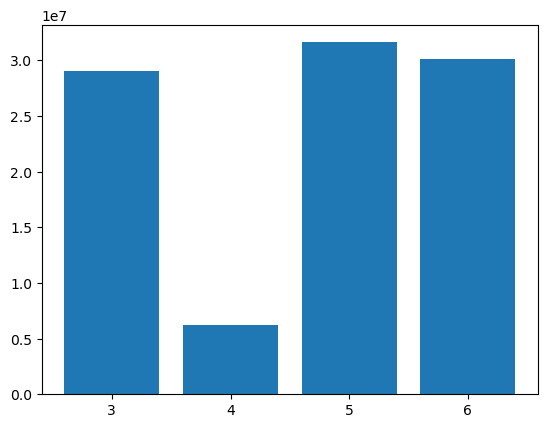

In [50]:
plt.bar(p['Month_of_Journey'],p['sum'])
plt.xticks(p['Month_of_Journey']);

In [51]:
# Prices
z=df.groupby(['Month_of_Journey'])['Price'].agg(['sum']).iloc[:,0]
z=list(z)
z

[29073812, 6226744, 31635040, 30141510]

In [52]:
# Month
a=df.groupby(['Month_of_Journey'])['Price'].agg(['sum']).index
# a=list(a)
a

Index([3, 4, 5, 6], dtype='int32', name='Month_of_Journey')

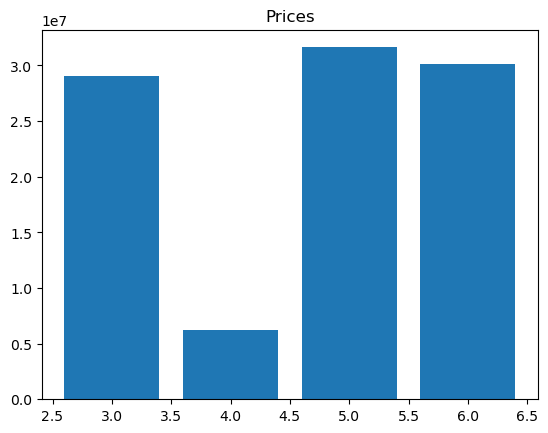

In [53]:
plt.bar(a,z)
plt.title('Prices')
plt.show()

In [54]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

# 7th Insights: Checking the Availablity of Flight with respect to Source and Destination

In [55]:
df1=df.groupby(['Destination','Source'])['Airline'].value_counts()


In [56]:
df1

Destination  Source    Airline                          
Banglore     Kolkata   Jet Airways                          1256
                       Air India                             512
                       IndiGo                                445
                       SpiceJet                              300
                       Vistara                               183
                       Air Asia                              150
                       GoAir                                  25
Cochin       Delhi     Jet Airways                          1586
                       Multiple carriers                    1196
                       Air India                             747
                       IndiGo                                705
                       SpiceJet                               87
                       Air Asia                               80
                       GoAir                                  76
                       Vistara   

In [57]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,12,5
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0,No info,4107,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,No info,7229,27,4
10681,Vistara,Banglore,Delhi,BLR → DEL,11:30,14:10,2h 40m,0,No info,12648,1,3
